In [1]:
from ISLP import load_data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline

In [7]:
boston_df = load_data("Boston")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
boston_df.shape

(506, 13)

In [9]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


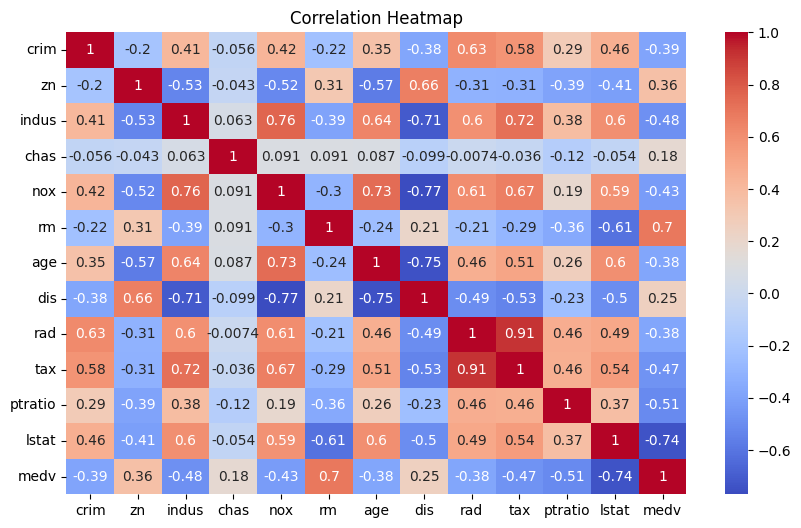

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### a)

In [25]:

X = boston_df.drop(columns=["crim"])
y = boston_df["crim"]

split = ShuffleSplit(n_splits=1, test_size=.2, random_state=22)

### LinearRegression

In [26]:
ols = LinearRegression()

ols_cv = cross_validate(
    ols,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(ols_cv)

{'fit_time': array([0.00200486]), 'score_time': array([0.00100017]), 'estimator': [LinearRegression()], 'test_score': array([-107.61681649])}


In [15]:
ols_cv["estimator"][0].coef_

array([ 4.28592753e-02, -5.66423734e-02, -6.33996905e-01, -8.68446527e+00,
       -3.50917151e-01, -3.55674918e-03, -8.86836130e-01,  5.75730894e-01,
       -3.27429970e-03, -2.64752289e-01,  1.52692671e-01, -1.31166715e-01])

### Ridge

In [16]:
alphas = 10**np.linspace(8, -2, 100) / y.std()

In [17]:
ridge = RidgeCV(alphas=alphas, cv=5)

ridge_cv = cross_validate(
    ridge,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(ridge_cv)

{'fit_time': array([0.9747746]), 'score_time': array([0.00100112]), 'estimator': [RidgeCV(alphas=array([1.16258182e+07, 9.21326214e+06, 7.30135268e+06, 5.78619713e+06,
       4.58546228e+06, 3.63390043e+06, 2.87980395e+06, 2.28219538e+06,
       1.80860081e+06, 1.43328521e+06, 1.13585402e+06, 9.00144885e+05,
       7.13349427e+05, 5.65317222e+05, 4.48004230e+05, 3.55035691e+05,
       2.81359713e+05, 2.22972761e+05, 1.76702100e+05, 1.40033392e+05,
       1.10974069e+05, 8.79450515e+0...
       2.44712330e-01, 1.93930337e-01, 1.53686475e-01, 1.21793903e-01,
       9.65195855e-02, 7.64901209e-02, 6.06171127e-02, 4.80380251e-02,
       3.80693134e-02, 3.01692798e-02, 2.39086383e-02, 1.89471870e-02,
       1.50153217e-02, 1.18993856e-02, 9.43005961e-03, 7.47316097e-03,
       5.92235227e-03, 4.69336289e-03, 3.71940983e-03, 2.94756868e-03,
       2.33589777e-03, 1.85115903e-03, 1.46701188e-03, 1.16258182e-03]),
        cv=5)], 'test_score': array([-107.61913357])}


### Lasso

In [18]:
lasso = LassoCV(alphas=alphas, cv=5)

lasso_cv = cross_validate(
    lasso,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(lasso_cv)

{'fit_time': array([0.03611994]), 'score_time': array([0.00099874]), 'estimator': [LassoCV(alphas=array([1.16258182e+07, 9.21326214e+06, 7.30135268e+06, 5.78619713e+06,
       4.58546228e+06, 3.63390043e+06, 2.87980395e+06, 2.28219538e+06,
       1.80860081e+06, 1.43328521e+06, 1.13585402e+06, 9.00144885e+05,
       7.13349427e+05, 5.65317222e+05, 4.48004230e+05, 3.55035691e+05,
       2.81359713e+05, 2.22972761e+05, 1.76702100e+05, 1.40033392e+05,
       1.10974069e+05, 8.79450515e+0...
       2.44712330e-01, 1.93930337e-01, 1.53686475e-01, 1.21793903e-01,
       9.65195855e-02, 7.64901209e-02, 6.06171127e-02, 4.80380251e-02,
       3.80693134e-02, 3.01692798e-02, 2.39086383e-02, 1.89471870e-02,
       1.50153217e-02, 1.18993856e-02, 9.43005961e-03, 7.47316097e-03,
       5.92235227e-03, 4.69336289e-03, 3.71940983e-03, 2.94756868e-03,
       2.33589777e-03, 1.85115903e-03, 1.46701188e-03, 1.16258182e-03]),
        cv=5)], 'test_score': array([-107.62256794])}


In [19]:
lasso_cv["estimator"][0].alpha_

0.001162581824258591

In [20]:
lasso_cv["estimator"][0].coef_

array([ 4.28179849e-02, -5.83254542e-02, -6.20596067e-01, -8.30324890e+00,
       -3.45151440e-01, -3.88332314e-03, -8.79289688e-01,  5.74446731e-01,
       -3.27944425e-03, -2.59405255e-01,  1.52943401e-01, -1.30549522e-01])

### PCA

In [21]:
pcr = make_pipeline(PCA(n_components="mle"), ols)

pcr_cv = cross_validate(
    pcr,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(pcr_cv)

{'fit_time': array([0.0030067]), 'score_time': array([0.00099921]), 'estimator': [Pipeline(steps=[('pca', PCA(n_components='mle')),
                ('linearregression', LinearRegression())])], 'test_score': array([-108.11744427])}


### PartialLeastSquares

In [22]:
pls = PLSRegression()

grid_search = GridSearchCV(
    estimator=pls,
    param_grid={"n_components": range(1, X.shape[1] - 1)},
    cv=5,
    scoring="neg_mean_squared_error"
)

grid_search.fit(X, y)

grid_search.best_score_

-46.17710538035484